### Visualisation of the data

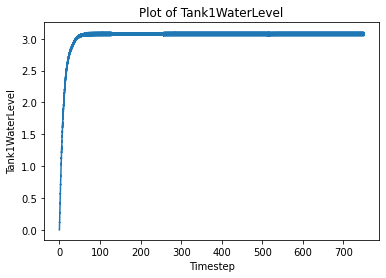

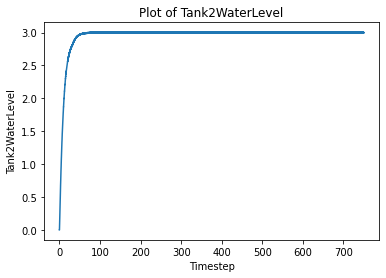

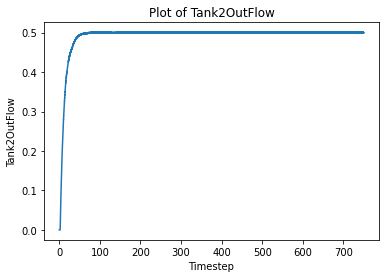

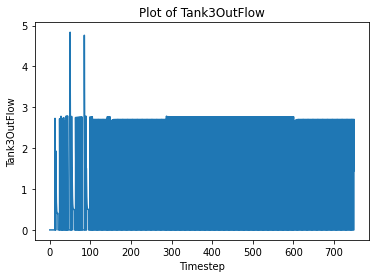

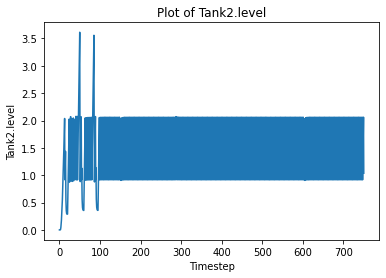

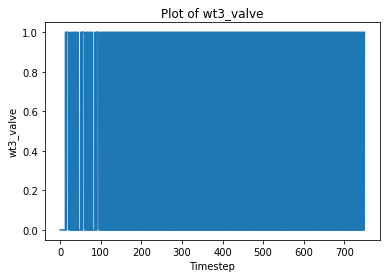

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

# mydata = read_csv('waterTankNew.csv', header=0, index_col=0)
mydata = read_csv('waterTank_stuckAt.csv', header=0, index_col=0)
# attr = ["wt3_valve", "Tank1InFlow", "Tank1WaterLevel", "Tank3OutFlow", "Tank2.level"]
attr = ["Tank1WaterLevel", "Tank2WaterLevel", "Tank2OutFlow", "Tank3OutFlow", "Tank2.level", "wt3_valve"]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
    actual = mydata.iloc[:2000,i]
    actual = mydata.iloc[:,i]
#     actual = mydata.iloc[750:1000,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
#     plt.plot(actual, label="original")
    plt.plot(actual)
#     plt.legend()
    plt.show()

### Pairwise correlations

In [10]:
corr_matrix = mydata[attr].corr(method='pearson')
# print the correlation matrix
print(corr_matrix)

                 Tank1WaterLevel  Tank2WaterLevel  Tank2OutFlow  Tank3OutFlow  \
Tank1WaterLevel         1.000000         0.998083      0.995967      0.066652   
Tank2WaterLevel         0.998083         1.000000      0.998255      0.066734   
Tank2OutFlow            0.995967         0.998255      1.000000      0.067203   
Tank3OutFlow            0.066652         0.066734      0.067203      1.000000   
Tank2.level             0.341942         0.342517      0.343063     -0.022859   
wt3_valve               0.049832         0.049817      0.049608      0.887066   

                 Tank2.level  wt3_valve  
Tank1WaterLevel     0.341942   0.049832  
Tank2WaterLevel     0.342517   0.049817  
Tank2OutFlow        0.343063   0.049608  
Tank3OutFlow       -0.022859   0.887066  
Tank2.level         1.000000  -0.110587  
wt3_valve          -0.110587   1.000000  


In [8]:
corr_matrix = mydata[attr].corr(method='spearman')
# print the correlation matrix
print(corr_matrix)

                 Tank1WaterLevel  Tank2WaterLevel  Tank2OutFlow  Tank3OutFlow  \
Tank1WaterLevel         1.000000         0.279742     -0.049151      0.006864   
Tank2WaterLevel         0.279742         1.000000      0.913629      0.001122   
Tank2OutFlow           -0.049151         0.913629      1.000000      0.001710   
Tank3OutFlow            0.006864         0.001122      0.001710      1.000000   
Tank2.level             0.061705         0.070348      0.071459     -0.122515   
wt3_valve              -0.000831        -0.009872     -0.009680      0.923004   

                 Tank2.level  wt3_valve  
Tank1WaterLevel     0.061705  -0.000831  
Tank2WaterLevel     0.070348  -0.009872  
Tank2OutFlow        0.071459  -0.009680  
Tank3OutFlow       -0.122515   0.923004  
Tank2.level         1.000000  -0.100145  
wt3_valve          -0.100145   1.000000  


In [13]:
### Visualize as a heatmap
import seaborn as sns

attr = ["Tank1WaterLevel", "Tank2WaterLevel", "Tank2OutFlow", "Tank3OutFlow", "Tank2.level", "wt3_valve"]
# corr_matrix = mydata[attr].corr(method='pearson')
corr_matrix = mydata.corr(method='pearson')

# Set up the heatmap using Seaborn
sns.set(style='white')
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
fig, ax = plt.subplots(figsize=(10,0))
sns.heatmap(corr_matrix, mask=mask, square=True, cmap='coolwarm', annot=True, ax=ax)

# Show the plot
plt.show()

ValueError: 'box_aspect' and 'fig_aspect' must be positive

ValueError: 'box_aspect' and 'fig_aspect' must be positive

<Figure size 720x0 with 2 Axes>

### Granger Causality Analysis

In [22]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# Load the time series data into a pandas DataFrame
# df = read_csv('waterTank_stuckAt.csv')
df = read_csv('trig.csv')

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
print(train_size)
train_data = df[:train_size]
test_data = df[train_size:]

# Define the lag order
lag_order = 2

# Fit the Granger causality model using the training set
granger_model = grangercausalitytests(train_data, lag_order, verbose=False)

# Test the model's performance using the testing set
results = []
for i in range(lag_order, len(test_data)):
    x = test_data.iloc[i-lag_order:i, 0].values
    y = test_data.iloc[i-lag_order:i, 1].values
    predicted_y = granger_model[lag_order][0].params[1] + \
    granger_model[lag_order][0].params[3] * x[-1] + \
    granger_model[lag_order][0].params[4] * y[-1]
    actual_y = test_data.iloc[i, 1]
    results.append((actual_y, predicted_y))
    
# Evaluate the results using statistical tests
actual_values = [r[0] for r in results]
predicted_values = [r[1] for r in results]
f_test = granger_model[lag_order][0].f_test([[0, 1, 0, 0, 0]])
p_value = f_test[1][0][0]

# Print the results
print('Granger causality results:')
print(f'F-test statistic: {f_test[0][0][0]:.2f}')
print(f'p-value: {p_value:.4f}')
print(f'R-squared: {granger_model[lag_order][0].rsquared:.2f}')

896


InfeasibleTestError: The Granger causality test statistic cannot be compute because the VAR has a perfect fit of the data.